In [32]:
import sys, os
import pandas as pd
import plotly.express as px


In [33]:
### OK for 2006-2020

change_city_name = {"Tokusima-shi": "Tokushima-shi"}

change_variable_name = {"Fuel,light & water charges": "Fuel, light & water charges", 
"Cooked food with rice,bread or noodles": "Cooked food with rice, bread or noodles",
"Num.of tabulated households": "Num. of tabulated households",
"Oils,fats & seasonings": "Oils, fats & seasonings",
"Pocket money \(of which,detailed uses unknown\)": "Pocket money (of which, detailed uses unknown)",
"Clothes & footwear": "Clothing & footwear",
"Expenditure in kind": "Expenditures in kind",
"Preserved fruits": "Processed fruits",
"Household durables": "Household durable goods",
"Non-durables": "Non-durable goods",
"\(a\)": "(Regrouped) Intel exchange",
"\(b\)": "(Regrouped) Expense (except housing)"}

def read_income_xlsx(with_name, sheet='総', nrow= 133, column_range = "AE:CF"):
    df = pd.read_excel(with_name, sheet, skiprows=10, nrows = nrow, usecols=column_range)
    year = int(with_name.split("/")[-1][:4])

    columns = df.columns.tolist()

    column_content = {}

    for _, row in df.loc[[2]].iterrows():
        for c in columns:
            if isinstance(row[c], str):
                if c not in column_content:
                    column_content[c] = row[c]

    city_names = []

    for _, row in df.loc[[3]].iterrows():
        for c in columns:
            if isinstance(row[c], str):
                city_name = row[c]
                if c in column_content:
                    city_name = column_content[c].strip() + " " + row[c].strip()
                city_name = city_name.replace("- ", "-").replace(" -", "-")
                if city_name in change_city_name:
                    city_name = change_city_name[city_name]
                city_names.append(city_name)

    df = df.iloc[4:]


    df.set_index(df.columns[-1], inplace = True)
    df.index.names = ["variable"]

    df = df.iloc[:, :-1]

    df.columns = city_names

    df["year"] = year

    df.reset_index(inplace=True)
    df.drop_duplicates(subset=['variable'], inplace=True)
    for v in change_variable_name:
        df["variable"] = df["variable"].str.replace(v, change_variable_name[v])
    #return df
    return pd.melt(df, id_vars=['variable', 'year'],value_vars=city_names, var_name="city")




In [34]:
#2017 early AJ:CI, 145
#2012 early AJ:CJ, 145
#2009 early AJ:CJ, 144
#2006 early "全"


#file_name = "./income_monthly_average/2013 Yearly Average Survey Results.xls"

#temp = read_income_xlsx(file_name, "総", 145, "AJ:CK")
#temp[temp["variable"] == "Education"]

file_name = "./income_monthly_average/2006 Yearly Average Survey Results.xls"

temp = read_income_xlsx(file_name, "全", 144, "AL:CJ")


In [35]:
top_folder = "./income_monthly_average/"
extension = ".xls"

file_name = "./income_monthly_average/2020 Yearly Average Survey Results.xls"

df = read_income_xlsx(file_name)

for (head, dirs, files) in os.walk(top_folder):
    for file in files:
        if file.endswith(extension):
            current_file_path = os.path.abspath(os.path.dirname(os.path.join(head, file)))
            with_name = current_file_path + "/"+ file
            #file_name = "./income_monthly_average/2020 Yearly Average Survey Results.xls"
            year = int(with_name.split("/")[-1][:4])
            #print (year)
                
            if year < 2020 and year > 2006:
                print (year)
                column_range = "AE:CF"
                nrow= 133
                sheet = "総"

                if year <= 2017 and year > 2012:
                    #2017 early AJ:CI, 145
                    column_range = "AJ:CK"
                    nrow = 145
                elif year <= 2012 and year > 2009:
                    #2012 early AJ:CJ, 145
                    column_range = "AJ:CJ"
                elif year <= 2009 and year > 2007:
                    column_range = "AJ:CJ"
                    nrow = 144
                elif year <= 2007 and year > 2006:
                    #2009 early AJ:CJ, 144
                    column_range = "AL:CJ"
                    nrow = 144
                elif year == 2006:
                    sheet = "全"
                    column_range = "AL:CJ"
                    nrow = 144

                
                temp = read_income_xlsx(with_name, sheet, nrow, column_range)
                df = pd.concat([df, temp])

2012
2010
2013
2011
2017
2015
2009
2018
2007
2016
2014
2019
2008


In [36]:
df.to_csv("expenditure.tsv", sep="\t", index=False)

In [37]:
temp_df = df[(df["city"].isin(["Osaka-shi", "Ku-areas of Tokyo", "Yokohama-shi", "Kyoto-shi"])) & (df["variable"] == "Package tours")].sort_values(["year", "city"])

fig = px.line(temp_df, x="year", y="value", color='city')
fig.update_layout(height=800, width=1600, title_text="Monthly expenditure for package tours",  xaxis_title="Year", yaxis_title="Expenditure in yen", font=dict(size=22))

fig.show()

In [38]:
df.head()

,variable,year,city,value
0,Distribution of households,2020,Sapporo-shi,170
1,Num. of tabulated households,2020,Sapporo-shi,106
2,Num. of persons per household (persons),2020,Sapporo-shi,2.05
3,Num. of earners per household (persons),2020,Sapporo-shi,0.95
4,Age of household heads (years old),2020,Sapporo-shi,57.3


In [39]:
temp_df = df[(df["city"].isin(["Osaka-shi", "Ku-areas of Tokyo", "Yokohama-shi", "Kyoto-shi"])) & (df["variable"] == "Accommodation services")].sort_values(["year", "city"])

fig = px.line(temp_df, x="year", y="value", color='city')
fig.update_layout(height=800, width=1600, title_text="Monthly expenditure for accommodation services",  xaxis_title="Year", yaxis_title="Expenditure in yen", font=dict(size=22))

fig.show()

In [40]:
temp_df = df[(df["city"].isin(["Osaka-shi", "Ku-areas of Tokyo", "Yokohama-shi", "Kyoto-shi"])) & (df["variable"] == "Eating out")].sort_values(["year", "city"])

fig = px.line(temp_df, x="year", y="value", color='city')
fig.update_layout(height=800, width=1600, title_text="Monthly expenditure for eating out",  xaxis_title="Year", yaxis_title="Expenditure in yen", font=dict(size=22))

fig.show()

In [41]:
temp_df = df[(df["city"].isin(["Osaka-shi", "Ku-areas of Tokyo", "Yokohama-shi", "Kyoto-shi"])) & (df["variable"] == "Engel's coefficient (%)")].sort_values(["year", "city"])

fig = px.line(temp_df, x="year", y="value", color='city')
fig.update_layout(height=800, width=1600, title_text="Monthly Engel's coefficient (%)",  xaxis_title="Year", yaxis_title="Engel's coefficient (%)", font=dict(size=22))

fig.show()

In [42]:
df[(df["city"] == "Kitakyushu-shi") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]]

,year,value
6499,2020,28.2
6603,2013,23.2
6603,2017,25.6
6603,2015,25.3
6425,2009,23.5
6499,2018,26.1
5165,2007,23.8
6603,2016,25.4
6603,2014,26.2
6499,2019,28.1


<AxesSubplot:xlabel='year'>

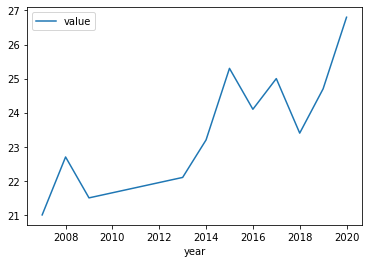

In [43]:
df[(df["city"] == "Okayama-shi") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]].sort_values("year").plot(x="year", y="value")

<AxesSubplot:xlabel='year'>

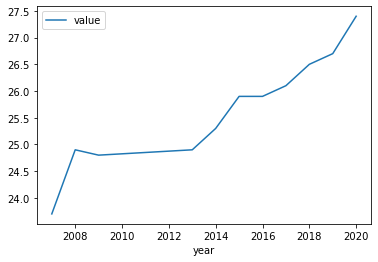

In [44]:
df[(df["city"] == "Ku-areas of Tokyo") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]].sort_values("year").plot(x="year", y="value")

<AxesSubplot:xlabel='year'>

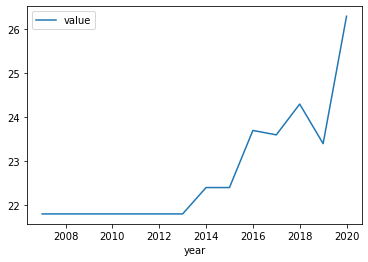

In [45]:
df[(df["city"] == "Nagano-shi") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]].sort_values("year").plot(x="year", y="value")

In [46]:
df["variable"].value_counts().head(10)

Rate of owned dwellings (%)              720
Fish-paste products                      720
Furniture & household utensils           720
Medicines                                720
Other processed vegetables & seaweeds    720
Lesson fees                              720
Remittance                               720
Other recreational services              720
Processed meat                           720
Goods (commodities)                      720
Name: variable, dtype: int64

In [51]:
df["variable"].value_counts().tail(20)

Toilet articles                                  49
Materials for repairs & maintenance              49
(Regrouped) Expenses for reading & recreation    49
Bicycles                                         49
Semi-durables                                    49
Household durables                               49
Meat products                                    49
Automotive maintenance                           49
Fresh meat                                       49
Age of head (years old)                          49
Durables                                         49
Automobiles                                      49
Fresh fish & shellfish                           49
Living expenditure                               49
Preserved fruits                                 49
Non-durables                                     49
Expenditure in kind                              49
Earners per household (persons)                  49
Domestic durables                                49
Persons per 